In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option("display.max_rows", None)

In [7]:
index_names = ["unit_number", "time_cycles"]
setting_names = [f"setting_{i}" for i in range(1,4)]
sensor_names = [f"sensor_{i}" for i in range(1,22)]
column_names = index_names + setting_names + sensor_names
column_names

['unit_number',
 'time_cycles',
 'setting_1',
 'setting_2',
 'setting_3',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21']

In [8]:
train_df = pd.read_csv("../src/data/raw/train_FD001.txt", sep="\s+", header=None, names=column_names)
train_df.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [10]:
train_df.drop("setting_3", axis=1, inplace=True)

In [11]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_number")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_number', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [12]:
train_df = add_remaining_useful_life(train_df)
train_df[sensor_names + ["RUL"]].head()
train_df.isna().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
RUL            0
dtype: int64

In [13]:
# Visualización
df_hist_max = train_df.groupby('unit_number').max().reset_index()


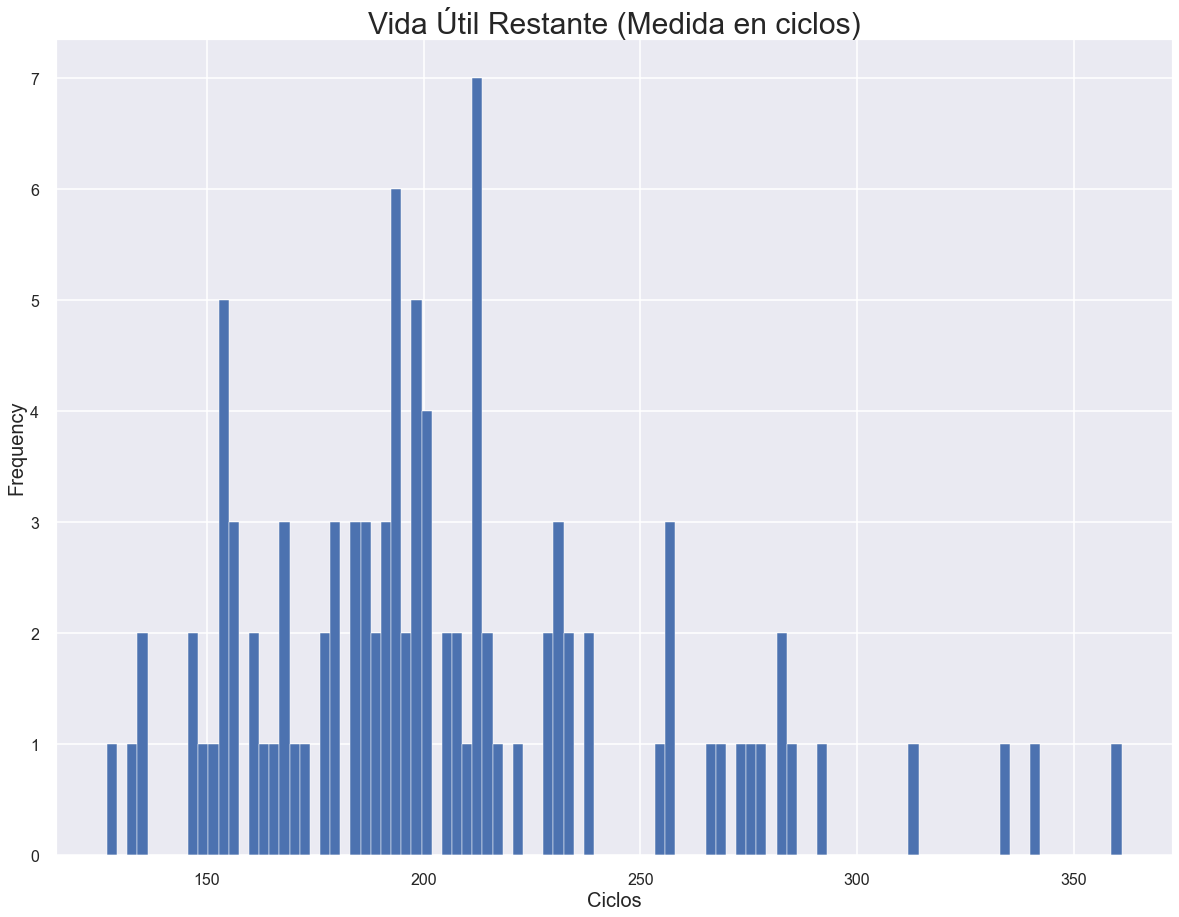

In [59]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(20,15))
    fig = plt.hist(df_hist_max['RUL'], bins=100)
    plt.xlabel('Ciclos', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.title('Vida Útil Restante (Medida en ciclos)', fontsize=30)

In [34]:
q25 = train_df['RUL'].quantile(0.25)
q50 = train_df['RUL'].quantile(0.50)
q75 = train_df['RUL'].quantile(0.75)
q100 = train_df['RUL'].quantile(1)

train_df['RUL'].quantile([0.1, 0.25, 0.5, 0.75, 1])

0.10     20.0
0.25     51.0
0.50    103.0
0.75    155.0
1.00    361.0
Name: RUL, dtype: float64

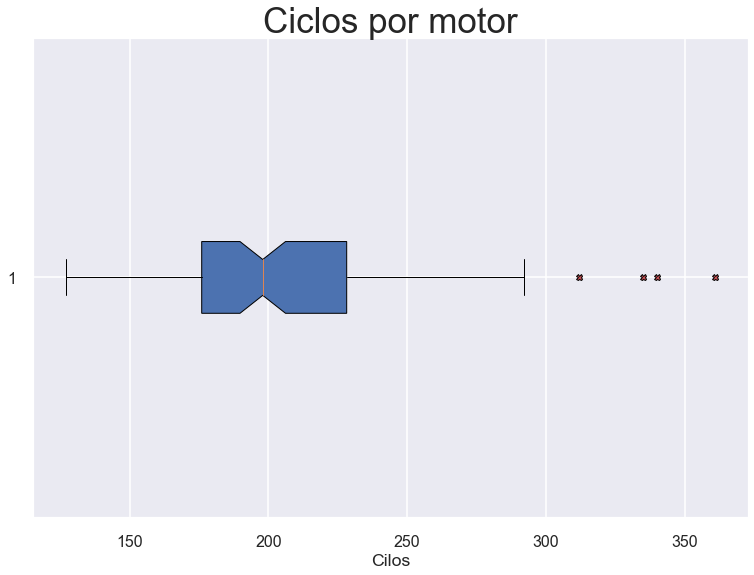

In [56]:
with plt.style.context('seaborn-poster'):
    outliers = dict(markerfacecolor='r', marker='X')
    fig, ax = plt.subplots()
    ax.set_title('Ciclos por motor', size=35)
    ax = plt.boxplot(df_hist_max['RUL'], vert=False, notch=True, flierprops=outliers, patch_artist=True)
    plt.xlabel('Cilos')

In [42]:
class_labels = ['Brand new', 'Healthy', 'Mature', 'Attention required']
train_df['Lifecycle_class'] = pd.cut(train_df['RUL'], bins=[-1, q25, q50, q75, q100], labels=class_labels)

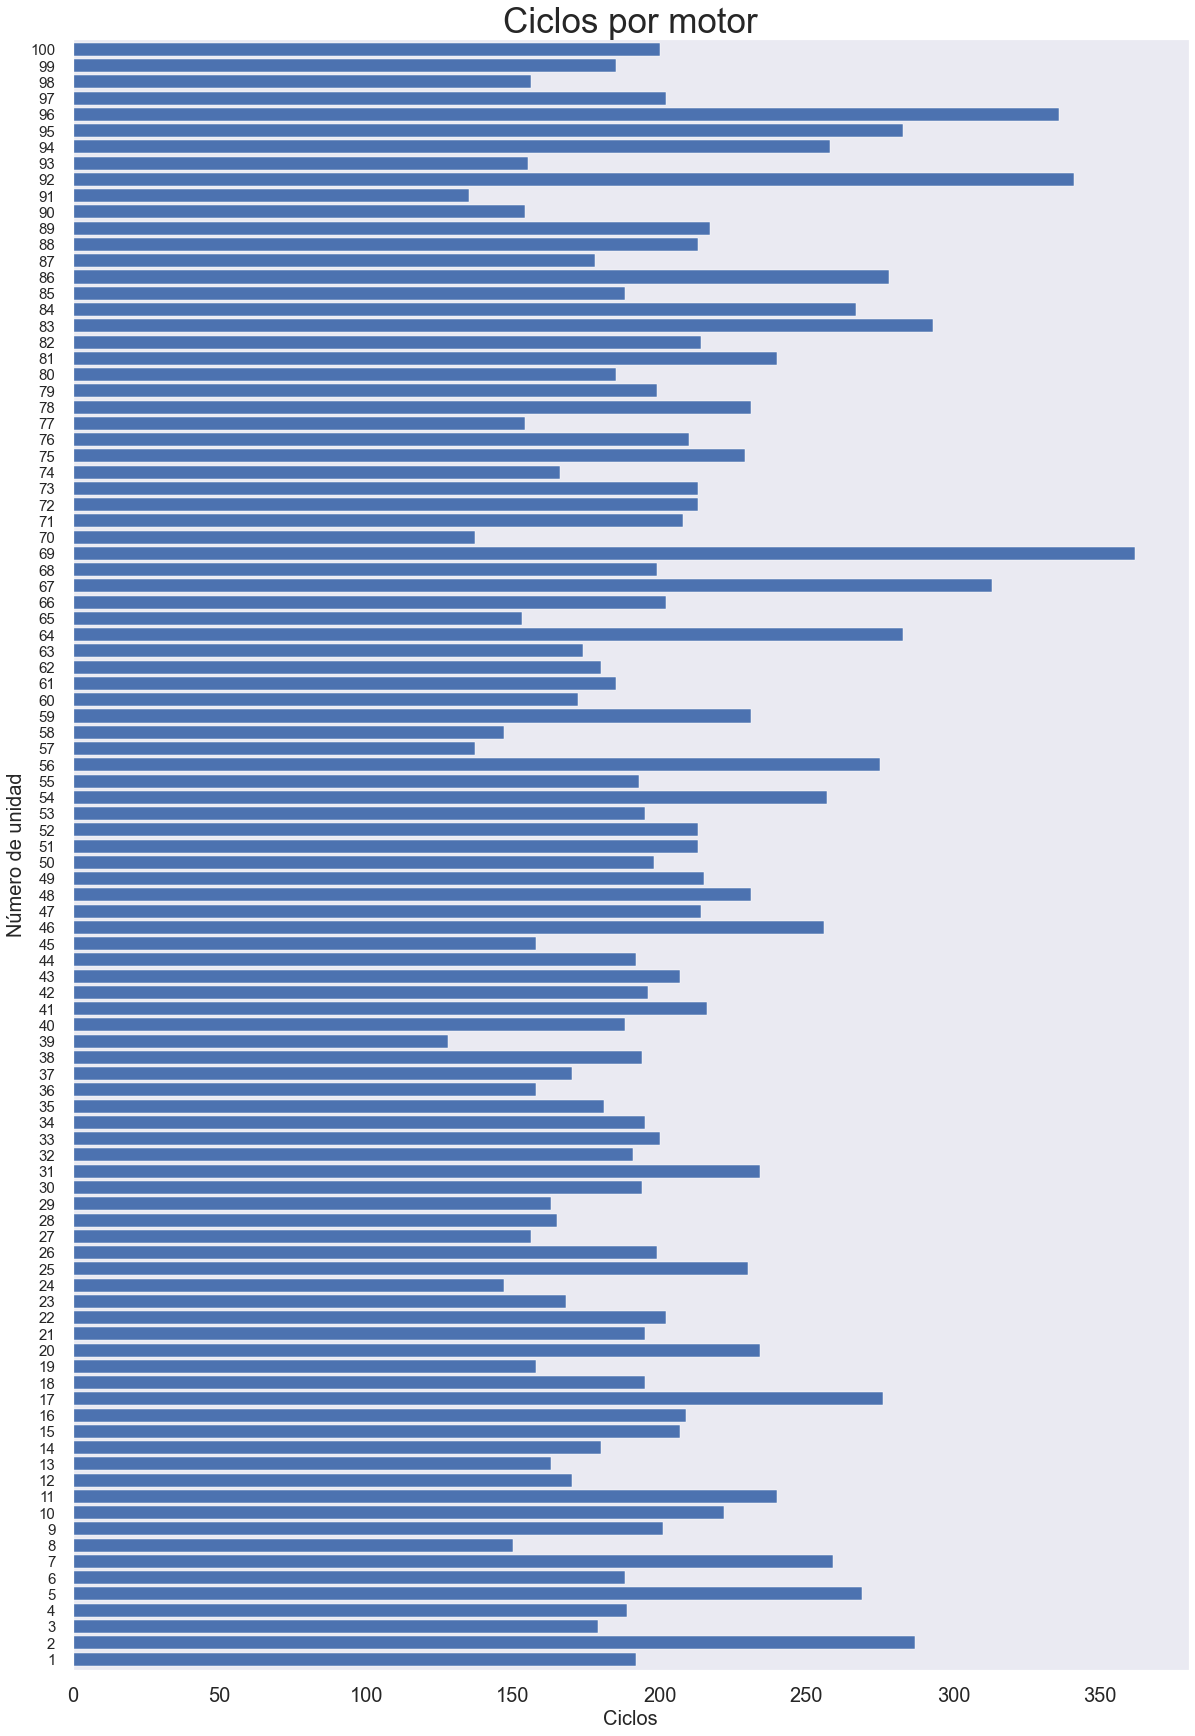

<Figure size 921.6x633.6 with 0 Axes>

In [61]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(20,30))
    ax=train_df.groupby('unit_number')['time_cycles'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
    plt.title('Ciclos por motor', size=35)
    plt.xlabel('Ciclos', size=20)
    plt.xticks(size=20)
    plt.ylabel('Número de unidad', size=20)
    plt.yticks(size=15)
    plt.grid()
    plt.show()
    plt.savefig("../images/Ciclos_por_motor.jpg")